In [1]:
# notebook for looking at magnitude patterns on UF
import datasets
from datasets import Dataset
import pandas as pd
import matplotlib.pyplot as plt

/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = Dataset.load_from_disk("../../data/ultrafeeddiff/")

(array([13185., 58035., 20426., 50590., 16439., 30101., 37124., 28917.,
        60129., 25079.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

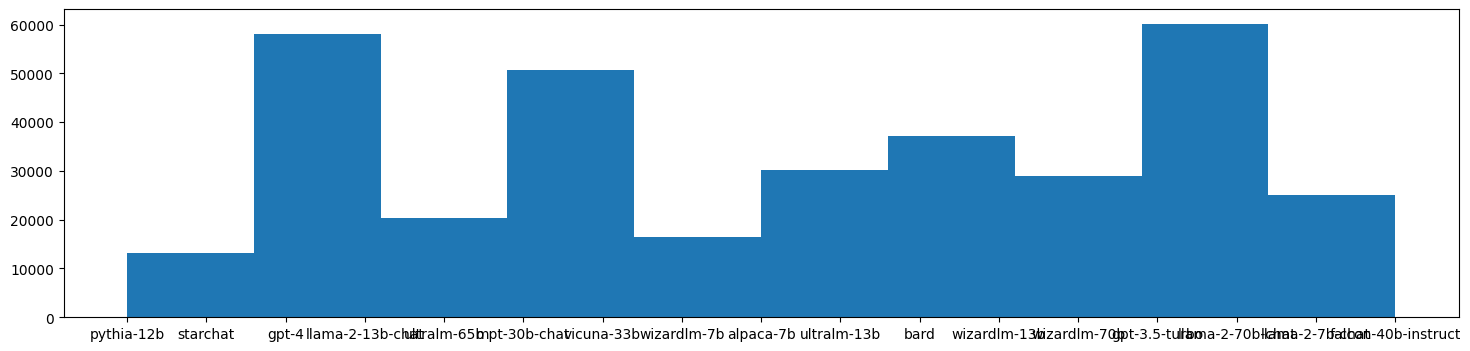

In [10]:
plt.figure(figsize=(18,4))


In [11]:
dataset

Dataset({
    features: ['question', 'source', 'modj', 'modk', 'tokj', 'tok', 'response_j', 'response_k', 'magnitude', '__index_level_0__'],
    num_rows: 340025
})

In [12]:
dset = Dataset.load_from_disk("../../data/ultrafeedall/")

In [13]:
dset

Dataset({
    features: ['question', 'source', 'modj', 'modk', 'tokj', 'tok', 'response_j', 'response_k', 'magnitude'],
    num_rows: 383796
})